<a href="https://www.kaggle.com/code/mampihemram/mcdonald-s-financial-statements-2002-2022?scriptVersionId=165378090" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mcdonalds-financial-statements-2002-2022/McDonalds_financial_statements.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("/kaggle/input/mcdonalds-financial-statements-2002-2022/McDonalds_financial_statements.csv")
df.head()

,Year,Market cap ($B),Revenue ($B),Earnings ($B),P/E ratio,P/S ratio,P/B ratio,Operating Margin (%),EPS ($),Shares Outstanding ($B),Cash on Hand ($B),Dividend Yield (%),Dividend (stock split adjusted) ($),Net assets ($B),Total assets ($B),Total debt ($B),Total liabilities ($B)
0,2022,193.01,23.18,7.82,31.3,8.33,-32.2,33.76,8.42,0.73,2.58,2.15,5.66,-6.01,50.43,48.03,56.43
1,2021,200.31,23.22,9.12,26.5,8.63,-43.5,39.31,10.11,0.74,4.70,1.96,5.25,-4.61,53.60,48.64,58.20
2,2020,159.88,19.20,6.14,33.8,8.32,-20.4,31.97,6.35,0.74,3.44,2.35,5.04,-7.83,52.62,48.51,60.45
3,2019,147.47,21.28,8.01,24.8,6.93,-18.0,38.04,7.98,0.74,0.89,2.39,4.73,-8.22,47.51,46.87,55.72
4,2018,136.21,21.02,7.81,23.2,6.48,-21.8,37.17,7.65,0.76,0.86,2.36,4.19,-6.26,32.81,31.07,39.06


In [4]:
df.tail()

,Year,Market cap ($B),Revenue ($B),Earnings ($B),P/E ratio,P/S ratio,P/B ratio,Operating Margin (%),EPS ($),Shares Outstanding ($B),Cash on Hand ($B),Dividend Yield (%),Dividend (stock split adjusted) ($),Net assets ($B),Total assets ($B),Total debt ($B),Total liabilities ($B)
16,2006,53.36,20.81,3.88,15.4,2.56,3.45,19.30,2.88,1.23,2.13,2.26,1.00,15.45,29.02,8.43,13.56
17,2005,42.59,20.46,3.70,16.4,2.08,2.81,18.09,2.06,1.25,4.26,1.99,0.67,15.14,29.98,10.14,14.84
18,2004,40.71,19.06,3.20,17.6,2.14,2.87,16.80,1.82,1.25,1.37,1.72,0.55,14.20,27.83,9.21,13.63
19,2003,31.33,17.14,2.34,21.4,1.83,2.62,13.69,1.16,1.27,0.49,1.61,0.40,11.98,25.52,9.73,13.54
20,2002,20.39,15.40,1.66,23.0,1.32,1.98,10.79,0.70,1.27,0.33,1.46,0.24,10.28,23.97,9.97,13.68


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 21 non-null     int64  
 1   Market cap ($B)                      21 non-null     float64
 2   Revenue ($B)                         21 non-null     float64
 3   Earnings ($B)                        21 non-null     float64
 4   P/E ratio                            21 non-null     float64
 5   P/S ratio                            21 non-null     float64
 6   P/B ratio                            21 non-null     float64
 7   Operating Margin (%)                 21 non-null     float64
 8   EPS ($)                              21 non-null     float64
 9   Shares Outstanding ($B)              21 non-null     float64
 10  Cash on Hand ($B)                    21 non-null     float64
 11  Dividend Yield (%)                

In [6]:
df.describe()

,Year,Market cap ($B),Revenue ($B),Earnings ($B),P/E ratio,P/S ratio,P/B ratio,Operating Margin (%),EPS ($),Shares Outstanding ($B),Cash on Hand ($B),Dividend Yield (%),Dividend (stock split adjusted) ($),Net assets ($B),Total assets ($B),Total debt ($B),Total liabilities ($B)
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,2012.000000,96.824286,22.706190,6.214762,21.661905,4.234762,-7.100000,26.889048,4.852857,0.994762,2.387619,2.487143,2.754286,7.217143,35.016190,21.286190,27.793810
std,6.204837,50.396346,3.398316,2.226166,5.541974,2.266896,19.356029,8.355580,2.507501,0.200714,1.639948,0.575518,1.679874,9.489797,8.715523,14.922204,16.800857
min,2002.000000,20.390000,15.400000,1.660000,15.000000,1.320000,-45.900000,10.790000,0.700000,0.730000,0.330000,1.460000,0.240000,-8.220000,23.970000,8.430000,13.540000
25%,2007.000000,67.220000,20.810000,3.880000,16.500000,2.950000,-20.400000,19.300000,2.880000,0.790000,1.370000,2.150000,1.500000,-3.270000,29.390000,10.140000,14.840000
50%,2012.000000,90.220000,22.820000,6.860000,21.400000,3.360000,2.870000,28.520000,4.880000,1.000000,2.130000,2.390000,2.870000,12.850000,32.810000,13.630000,20.090000
75%,2017.000000,136.210000,24.620000,8.010000,24.800000,6.010000,5.530000,31.970000,6.350000,1.180000,2.580000,2.940000,3.830000,14.630000,36.620000,29.530000,37.070000
max,2022.000000,200.310000,28.100000,9.120000,33.800000,8.630000,15.100000,39.310000,10.110000,1.270000,7.680000,3.500000,5.660000,16.000000,53.600000,48.640000,60.450000


In [7]:
df.shape

(21, 17)

In [8]:
df.columns

Index(['Year', 'Market cap ($B)', 'Revenue ($B)', 'Earnings ($B)', 'P/E ratio',
       'P/S ratio', 'P/B ratio', 'Operating Margin (%)', 'EPS ($)',
       'Shares Outstanding ($B)', 'Cash on Hand ($B)', 'Dividend Yield (%)',
       'Dividend (stock split adjusted) ($)', 'Net assets ($B)',
       'Total assets ($B)', 'Total debt ($B)', 'Total liabilities ($B)'],
      dtype='object')

In [9]:
y = df["Market cap ($B)"]
x = df[['Revenue ($B)', 'Earnings ($B)', 'P/E ratio',
       'P/S ratio', 'P/B ratio', 'Operating Margin (%)', 'EPS ($)',
       'Net assets ($B)',
       'Total assets ($B)', 'Total debt ($B)', 'Total liabilities ($B)']]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=2536)
print(f"x_train:{x_train.shape}")
print(f"x_test:{x_test.shape}")
print(f"y_train:{y_train.shape}")
print(f"y_test:{y_test.shape}")

x_train:(16, 11)
x_test:(5, 11)
y_train:(16,)
y_test:(5,)


In [11]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [12]:
y_pred  = model.predict(x_test)

In [13]:
from sklearn.metrics import mean_absolute_error
print(f"Mean Absolute Error:{mean_absolute_error(y_test, y_pred)}")

Mean Absolute Error:3.7737287219238853


In [14]:
print(f"Train Accuracy:{model.score(x_train,y_train)}")
print(f"Test Accuracy:{model.score(x_test,y_test)}")

Train Accuracy:0.9997843715480172
Test Accuracy:0.9841367139092342


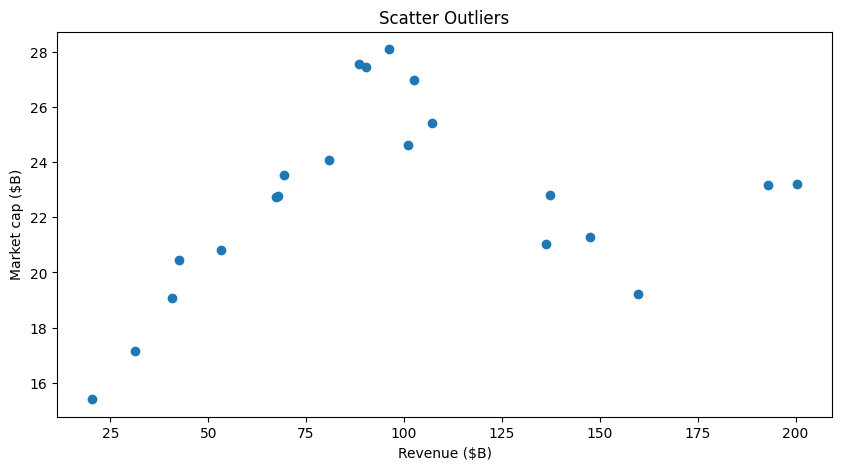

In [15]:
plt.figure(figsize=(10,5))
plt.scatter(df['Market cap ($B)'], df['Revenue ($B)'])
plt.ylabel('Market cap ($B)')
plt.xlabel('Revenue ($B)')
plt.title("Scatter Outliers");
plt.show()